Deputado Histogramado
============

[expressao.xyz/deputado/](http://expressao.xyz/deputado/)

Como processar as sessões do parlamento Português

Índice
-----

1. [Reunír o dataset](Deputado-Histogramado-1.ipynb)
2. [Contando as palavras mais comuns](Deputado-Histogramado-2.ipynb)
3. [Fazendo histogramas](Deputado-Histogramado-3.ipynb)
4. [Representações geograficas](Deputado-Histogramado-4.ipynb)
5. [Simplificar o dataset e exportar para o expressa.xyz/deputado/](Deputado-Histogramado-5.ipynb)

O que se passou nas mais de 4000 sessões de discussão do parlamento Português que ocorreram desde 1976? 
Neste notebook vamos tentar visualizar o que se passou da maneira mais simples - contando palavras, e fazendo gráficos.

Para obter os textos de todas as sessões usaremos o [demo.cratica.org](demo.cratica.org), onde podemos aceder facilmente a todas as sessões do parlamento de 1976 a 2015. Depois com um pouco de python, pandas e matplotlib vamos analisar o que se passou.

Para executar estes notebook será necessário descarregar e abrir com o Jupiter Notebooks (a distribuição Anaconda faz com que instalar todas as ferramentas necessárias seja fácil - https://www.continuum.io/downloads)

## Parte 4 - Regionalização

Vamos tentar representar que distritos de Portugal são mais referenciados no Parlamento.

Para isso vamos usar dois pacotes de python muito úteis e faceis de usar: geopy para obter as localizações das cidades, e Basemap para a representação.

Começemos por localizar todas os distritos/cidades. 
De notar que a função geocode aceita moradas e retorna as coordenadas de GPS. (!!) 



In [1]:
# capitais de distrito, encontra latitude e longitude

import geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim()

long = []
lat = []
cities = ['Açores','Madeira','Aveiro','Beja','Braga','Bragança','Castelo Branco','Coimbra','Évora','Faro','Guarda','Leiria','Lisboa','Portalegre','Porto','Santarém','Setúbal','Viana do Castelo','Vila Real','Viseu']
#cities = ['Aveiro','Braga','Porto','Lisboa']

for city in cities:
    location = geolocator.geocode(city+',Portugal')
    print(city + ':' + location.address + ' ('+str(location.longitude)+','+str(location.latitude)+')')
    long.append(location.longitude)
    lat.append(location.latitude)

Açores:Açores, Portugal (águas territoriais) (-25.4730851864796,37.80852735)
Madeira:Madeira, Portugal (águas territoriais) (-16.9817465612925,32.75175465)
Aveiro:Aveiro, Baixo Vouga, Centro, Portugal (-8.653784,40.640496)
Beja:Beja, Baixo Alentejo, Alentejo, Portugal (-7.865254,38.0156043)
Braga:Braga, Cávado, Norte, Portugal (-8.4280044,41.5510583)
Bragança:Bragança, Trás-os-Montes, Norte, Portugal (-6.7589838,41.8071182)
Castelo Branco:Castelo Branco, Beira Interior Sul, Centro, Portugal (-7.4992061,39.8204214)
Coimbra:Coimbra, Baixo Mondego, Centro, Portugal (-8.4292056,40.2109801)
Évora:Évora, Alentejo Central, Alentejo, Portugal (-7.9092807,38.5707742)
Faro:Faro, Algarve, Portugal (-7.93193651699148,37.0537571)
Guarda:Guarda, Beira Interior Norte, Centro, Portugal (-7.2689162,40.5388855)
Leiria:Leiria, Pinhal Litoral, Centro, Portugal (-8.8080364,39.7445357)
Lisboa:Lisboa, Grande Lisboa, Área Metropolitana de Lisboa, Portugal (-9.136506,38.7077926)
Portalegre:Portalegre, Alto Ale

De um modo similar ao que fizemos antes, vamos contar todas as ocorrencias em todas as sessões do nome de cada cidade

In [7]:
%matplotlib inline
import pylab
import matplotlib
import pandas
import numpy


dateparse = lambda x: pandas.datetime.strptime(x, '%Y-%m-%d')
sessoes = pandas.read_csv('sessoes_democratica_org.csv',index_col=0,parse_dates=['data'], date_parser=dateparse)

from functools import reduce

# retira falsas ocorrencias de 'guarda' e 'porto'
def conta_palavras(texto,palavra):
    return texto.replace('aeroporto','').replace('lopes porto','').replace('guardar','').replace('guardas','').replace('guardado','').replace('aguarda','').replace('vanguarda','').replace('salvaguarda','').replace('guarda nacional','').replace('guarda civil','').count(palavra.lower())

def conta_ocorrencias(palavra):
    return numpy.sum(sessoes['sessao'].map(lambda texto: conta_palavras(texto,palavra)))
    
print('A contar...')
contagens = []
for cidade in cities:
    contagem = conta_ocorrencias(cidade)
    print(cidade +' '+str(contagem))
    contagens.append(contagem)



A contar...
Açores 13047
Madeira 27571
Aveiro 4819
Beja 3786
Braga 14284
Bragança 2177
Castelo Branco 1769
Coimbra 8677
Évora 2354
Faro 2062
Guarda 4792
Leiria 2644
Lisboa 31234
Portalegre 1077
Porto 32680
Santarém 2073
Setúbal 4380
Viana do Castelo 2743
Vila Real 2099
Viseu 3117


Agora representamos o mapa, e depois desenhamos circulos para cada cidade, de cor e tamanho variável consoante o número de menções.

Para representar os distritos Portugueses necessitamos de um dataset com os 'shapefiles' destes: obtem-o em http://www.gadm.org/country
Alternativamente o script tambem executa sem a linha 'shp_info = ...'.


/Users/fsilva/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/fsilva/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/fsilva/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


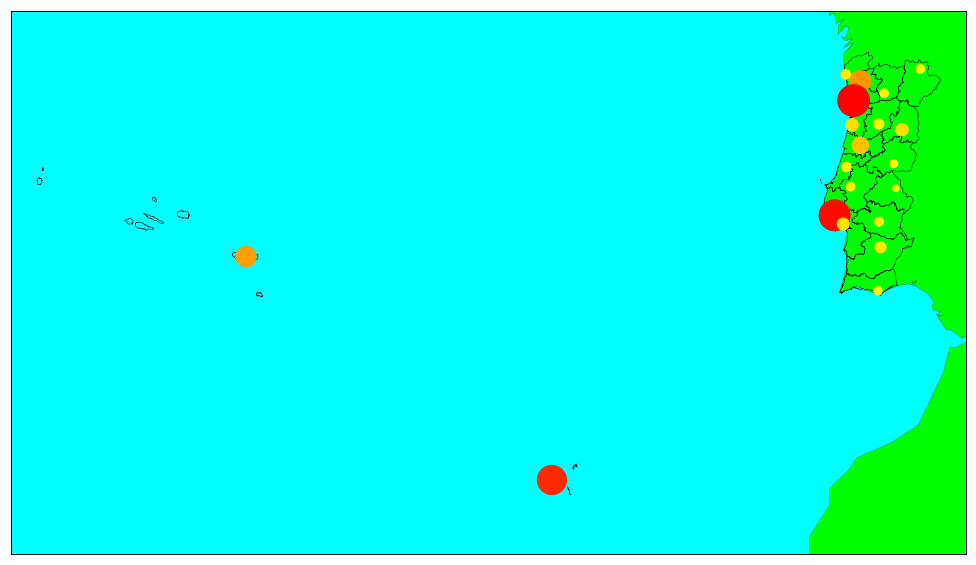

In [8]:
from mpl_toolkits.basemap import Basemap
pylab.figure(figsize=(20,10))
#map = Basemap(projection='merc',lat_0=40,lon_0=0,resolution='l',llcrnrlon=-10.5, llcrnrlat=36,urcrnrlon=-5.5, urcrnrlat=43) # PT continental
map = Basemap(projection='merc',lat_0=40,lon_0=0,resolution='l',llcrnrlon=-32, llcrnrlat=31,urcrnrlon=-5.5, urcrnrlat=43)
#shp_info = map.readshapefile('PRT_adm0','',drawbounds=True)#país
shp_info = map.readshapefile('PRT_adm1','',drawbounds=True)#distritos
#shp_info = map.readshapefile('PRT_adm2','',drawbounds=True)#concelhos
#shp_info = map.readshapefile('PRT_adm3','',drawbounds=True)#freguesias
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='#00ff00',lake_color='aqua')
map.drawmapboundary(fill_color='aqua')

contagens = numpy.array(contagens)
size = 10+1000*contagens/max(contagens)
color = contagens/max(contagens)

x,y = map(long, lat)
map.scatter(x, y,s=size, c=-color, zorder=10, cmap=pylab.autumn())

pylab.show()

Vamos claramente que a Madeira, Lisboa e Porto são as regiões mais discutidas. De seguida Açores, Braga e Coimbra. Já tinhamos estes dados na tabela acima, mas agora é visual.  De notar que as contagens de 'Porto' podem estar inflacionadas, pois a palavra é usada em vários contextos diferentes dificeis de isolar/rejeitar.



Fica como exercício contar e representar os concelhos de cada distrito!